In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
#list of useful libraries required for the project
import os
import tqdm
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import cv2
from glob import glob
import seaborn as sns
import random
from keras.preprocessing import image
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPool2D,GlobalAvgPool2D,GlobalMaxPooling2D
from keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from sklearn.model_selection import train_test_split

In [4]:
file = '/content/drive/MyDrive/DATASET.zip'

In [5]:
import zipfile as zf
data_zip = zf.ZipFile(file)
data_zip.extractall()
!ls

DATASET  drive	sample_data


In [6]:
from pathlib import Path
data = Path(r'/content/DATASET/Training')

In [7]:
images=[]
import os
for dirname,_,filenames in os.walk(data):
  for filename in filenames:
    file_name, file_extension = os.path.splitext(filename)
    if file_extension == '.db':
      continue
    else:
      img=os.path.join(dirname,filename)
      images.append(img)

In [8]:
images[:20]

['/content/DATASET/Training/Fake/500_f6.jpg',
 '/content/DATASET/Training/Fake/500_f1.jpg',
 '/content/DATASET/Training/Fake/14.jpg',
 '/content/DATASET/Training/Fake/1f (1).jpg',
 '/content/DATASET/Training/Fake/93.jpg',
 '/content/DATASET/Training/Fake/2f.jpg',
 '/content/DATASET/Training/Fake/500_f4.jpg',
 '/content/DATASET/Training/Fake/1.jpg',
 '/content/DATASET/Training/Fake/5f.jpg',
 '/content/DATASET/Training/Fake/3f.jpg',
 '/content/DATASET/Training/Fake/500_f3.jpg',
 '/content/DATASET/Training/Fake/500_f5.jpg',
 '/content/DATASET/Training/Fake/4f.jpg',
 '/content/DATASET/Training/Fake/8f.jpg',
 '/content/DATASET/Training/Fake/33.jpg',
 '/content/DATASET/Training/Fake/6f.jpg',
 '/content/DATASET/Training/Fake/72.jpg',
 '/content/DATASET/Training/Fake/34.jpg',
 '/content/DATASET/Training/Fake/7f.jpg',
 '/content/DATASET/Training/Fake/500_f2.jpg']

In [9]:
len(images)

126

In [10]:
class_values = []
for i in images:
    j = i.split('/')
    class_values.append(j[-2])

In [11]:
class_values[:10]

['Fake',
 'Fake',
 'Fake',
 'Fake',
 'Fake',
 'Fake',
 'Fake',
 'Fake',
 'Fake',
 'Fake']

In [12]:
len(class_values)

126

In [13]:
import random # Import the random module at the beginning of the cell
temp = list(zip(images,class_values))
random.shuffle(temp)
images, class_values = zip(*temp)
data = pd.DataFrame(list(zip(images, class_values)), columns=['image_path', 'Class_label'])

In [14]:
data

,image_path,Class_label
0,/content/DATASET/Training/Fake/2f.jpg,Fake
1,/content/DATASET/Training/Real/500_original_IM...,Real
2,/content/DATASET/Training/Real/500_original_IM...,Real
3,/content/DATASET/Training/Fake/34.jpg,Fake
4,/content/DATASET/Training/Fake/7f.jpg,Fake
...,...,...
121,/content/DATASET/Training/Fake/500_f3.jpg,Fake
122,/content/DATASET/Training/Real/23.jpg,Real
123,/content/DATASET/Training/Real/500_original_IM...,Real
124,/content/DATASET/Training/Real/500_original_IM...,Real


In [15]:
data.shape

(126, 2)

In [16]:
data.Class_label.value_counts()

,count
Class_label,
Real,105
Fake,21


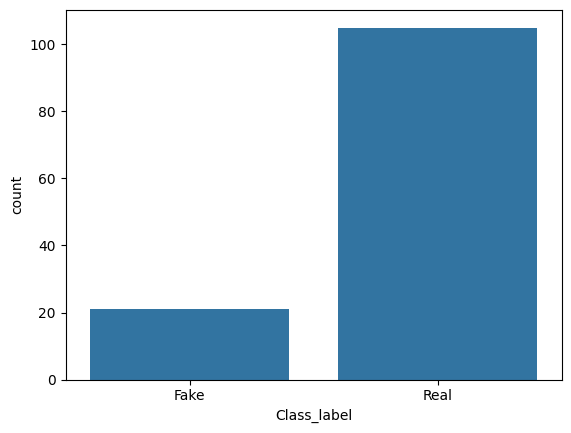

In [17]:
sns.countplot(x = data.Class_label, data = data)
plt.show()

In [18]:
from sklearn.utils import resample
df_c0 = data[data['Class_label'] =="Real"]
df_c1 = data[data['Class_label'] =="Fake"]

unsampled_df_c0 = resample(df_c0, replace=True, random_state=23, n_samples=500)
unsampled_df_c1 = resample(df_c1, replace=True, random_state=23, n_samples=500)

df_unsampled = pd.concat([unsampled_df_c0, unsampled_df_c1])
df_unsampled

,image_path,Class_label
101,/content/DATASET/Training/Real/500_original_IM...,Real
123,/content/DATASET/Training/Real/500_original_IM...,Real
53,/content/DATASET/Training/Real/12.jpg,Real
91,/content/DATASET/Training/Real/500_original_IM...,Real
69,/content/DATASET/Training/Real/r10.jpg,Real
...,...,...
62,/content/DATASET/Training/Fake/500_f4.jpg,Fake
4,/content/DATASET/Training/Fake/7f.jpg,Fake
25,/content/DATASET/Training/Fake/5f.jpg,Fake
90,/content/DATASET/Training/Fake/500_f5.jpg,Fake


In [19]:
df = df_unsampled

In [20]:
import os
from PIL import Image

In [21]:
def resize_images(img):
  file = Image.open(img)
  img = file.convert('RGB')
  img_bgr= img.resize((224, 224))
  img_bgr = np.array(img_bgr)
  return img_bgr

In [22]:
#save resized images into images.
images = [resize_images(img) for img in df['image_path']]

In [23]:
images

[array([[[149, 149, 148],
         [147, 147, 147],
         [149, 149, 149],
         ...,
         [ 99,  85,  79],
         [ 92,  78,  74],
         [ 82,  68,  64]],
 
        [[149, 149, 145],
         [148, 148, 146],
         [148, 148, 147],
         ...,
         [106,  90,  85],
         [106,  92,  89],
         [ 92,  79,  75]],
 
        [[148, 148, 146],
         [148, 148, 147],
         [148, 148, 148],
         ...,
         [ 98,  82,  78],
         [107,  92,  86],
         [103,  91,  83]],
 
        ...,
 
        [[145, 145, 145],
         [145, 145, 143],
         [143, 143, 141],
         ...,
         [146, 142, 139],
         [144, 140, 135],
         [142, 137, 131]],
 
        [[145, 145, 144],
         [143, 143, 142],
         [143, 143, 141],
         ...,
         [146, 142, 138],
         [144, 139, 135],
         [144, 135, 132]],
 
        [[145, 145, 142],
         [145, 145, 143],
         [144, 144, 142],
         ...,
         [146, 143, 138],
  

In [24]:
# print number of classes in our dataset
num_classes = len(np.unique(data['Class_label']))

In [25]:
num_classes

2

In [26]:
# save the class into class_names
class_names = list(data['Class_label'])

In [27]:
# Print the shape of the image
images[0].shape

(224, 224, 3)

Text(0.5, 1.0, 'Real')

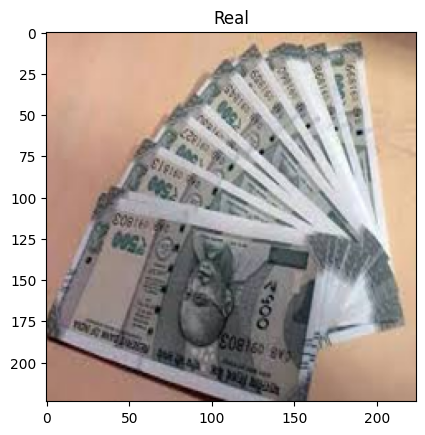

In [28]:
#See the image with class label
plt.imshow(images[20])
plt.title(class_names[20])

Text(0.5, 1.0, 'Real')

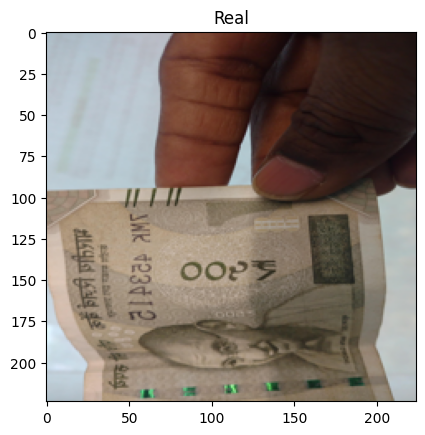

In [29]:
#See the image with class label
plt.imshow(images[120])
plt.title(class_names[120])

In [30]:
# Convert the images into array
images =  np.array(images)

In [31]:
# Shape of the images
images.shape

(1000, 224, 224, 3)

In [32]:
from sklearn.preprocessing import LabelEncoder
enc=LabelEncoder()
Y = enc.fit_transform(df['Class_label'])
from keras.utils  import to_categorical
y = to_categorical(Y)

In [33]:
enc.classes_

array(['Fake', 'Real'], dtype=object)

In [34]:
y[:10]

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.]])

In [35]:
y.shape

(1000, 2)

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(images, y, test_size=0.3,stratify = y,random_state=42)

In [38]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras import mixed_precision

# Enable Mixed Precision for Faster Training
mixed_precision.set_global_policy('mixed_float16')

# Image size (Reduced to 126x126 for faster training)
IMG_SIZE = 224
BATCH_SIZE = 10  # Increase batch size since we have smaller images
EPOCHS = 10

# Data Augmentation
train_datagen = ImageDataGenerator(
    rotation_range=20,
    zoom_range=0.1,
    horizontal_flip=True,
    vertical_flip=True,
    brightness_range=[0.8, 1.2]
)

# Apply augmentation only to training data
train_generator = train_datagen.flow(X_train, y_train, batch_size=BATCH_SIZE)

# Load VGG16 without top layers
base_model = VGG16(weights="imagenet", include_top=False, input_shape=(IMG_SIZE, IMG_SIZE, 3))

# Freeze base model initially
base_model.trainable = False

# Add custom layers on top
x = GlobalAveragePooling2D()(base_model.output)
x = Dense(512, activation="relu")(x)
x = BatchNormalization()(x)
x = Dropout(0.3)(x)
x = Dense(256, activation="relu")(x)
x = BatchNormalization()(x)
x = Dropout(0.3)(x)
output = Dense(2, activation="softmax", dtype="float32")(x)  # 9 classes

# Create model
model = Model(inputs=base_model.input, outputs=output)

# Compile model
model.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss="categorical_crossentropy",  # Change to 'categorical_crossentropy'
    metrics=["accuracy"],
)

# Callbacks
early_stopping = EarlyStopping(monitor="val_loss", patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor="val_loss", factor=0.2, patience=3, min_lr=1e-6)

# Train model
history = model.fit(
    train_generator,
    validation_data=(X_test, y_test),
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    callbacks=[early_stopping, reduce_lr],
    verbose=1
)

# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc * 100:.2f}%")


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 22s 161ms/step - accuracy: 0.6536 - loss: 0.7802 - val_accuracy: 0.7433 - val_loss: 1.0063 - learning_rate: 1.0000e-04
Epoch 2/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 10s 142ms/step - accuracy: 0.8354 - loss: 0.4607 - val_accuracy: 0.8867 - val_loss: 0.3932 - learning_rate: 1.0000e-04
Epoch 3/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 10s 138ms/step - accuracy: 0.8678 - loss: 0.3436 - val_accuracy: 0.9400 - val_loss: 0.2282 - learning_rate: 1.0000e-04
Epoch 4/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 9s 124ms/step - accuracy: 0.8568 - loss: 0.3912 - val_accuracy: 0.9500 - val_loss: 0.1638 - learning_rate: 1.0000e-04
Epoch 5/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 10s 145ms/step - accuracy: 0.9032 - loss: 0.2930 - val_accuracy: 0.9233 - val_loss: 0.2001 - learning_rate: 1.0000e-04
Epoch 6/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 10s 145ms/step - accuracy: 0.8831 - loss: 0.3115 - val_accuracy: 0.9267 - val_loss: 0.2245 - learning_rate: 1.0000e-04
Epoch 7/

In [39]:
# Save the trained model
model.save("model.h5")

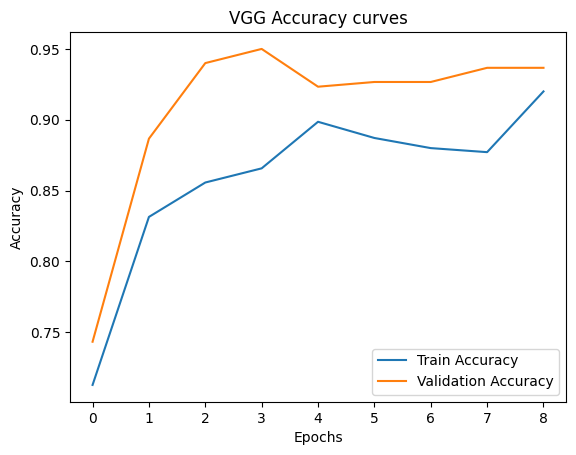

In [40]:
# Plot training and validation accuracy
plt.plot(history.history["accuracy"], label="Train Accuracy")
plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
plt.title("VGG Accuracy curves")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

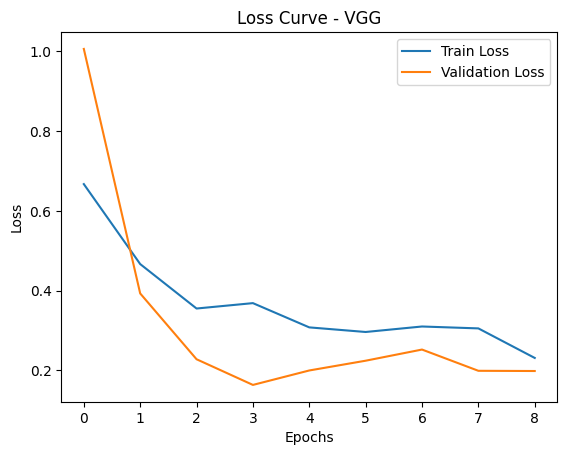

In [41]:
# Loss Plot
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Curve - VGG')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 174ms/step


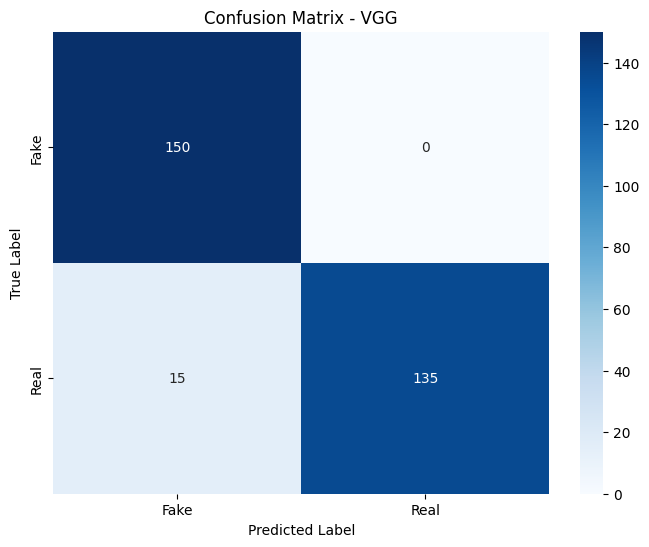

In [42]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Predict on the validation data
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert predictions to class labels

# Access true labels from y_test
y_true_classes = np.argmax(y_test, axis=1)  # True class labels

# Compute confusion matrix
conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(
    conf_matrix,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=enc.classes_,  # Use enc.classes_ for class names
    yticklabels=enc.classes_,  # Use enc.classes_ for class names
)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - VGG")
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Predicted class: Real
Actual class: Real


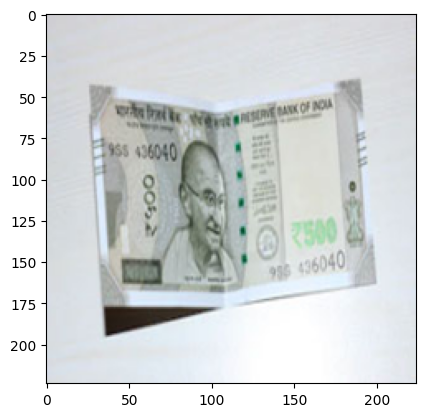

In [43]:
i = 22
pred = np.argmax(model.predict(np.array([X_test[i]]))[0])
act = np.argmax(y_test[i])
print("Predicted class: {}".format(enc.classes_[pred]))
print("Actual class: {}".format(enc.classes_[act]))
plt.imshow(X_test[i])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Predicted class: Real
Actual class: Real


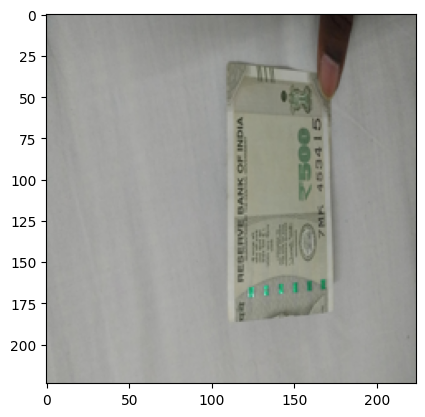

In [44]:
i = 120
pred = np.argmax(model.predict(np.array([X_train[i]]))[0])
act = np.argmax(y_train[i])
print("Predicted class: {}".format(enc.classes_[pred]))
print("Actual class: {}".format(enc.classes_[act]))
plt.imshow(X_train[i])

In [45]:
import tensorflow as tf
print(tf.__version__)

2.18.0


In [46]:
import numpy as np
print(np.__version__)

2.0.2
